In [1]:
import pandas as pd
import numpy as np

play_from=0
play_to=10

Y2022_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_03_2022_18MAY2022.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2021_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2021_18FEB2022.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2020_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2020_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2019_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2019_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2018_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2018_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2017_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2017_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2016_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2016_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2015_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2015_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)
Y2014_Page1 = pd.read_excel("EIA923_Schedules_2_3_4_5_M_12_2014_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data", skiprows=5)

pages=[Y2022_Page1,Y2021_Page1,Y2020_Page1,Y2019_Page1,Y2018_Page1,Y2017_Page1,Y2016_Page1,Y2015_Page1,Y2014_Page1]

C:\Python310\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
Y2013_Page1_df=pd.DataFrame(data=Y2022_Page1)

Y2013_Page1_df.head()

Page1_All=pd.concat(pages)

Page1_All=Page1_All.drop(["Nuclear Unit Id","Operator Id","Plant Id","Census Region","Reserved","NERC Region","NAICS Code","EIA Sector Number","Reserved.1","Reported\nFuel Type Code","Balancing\nAuthority Code","Sector Name","Combined Heat And\nPower Plant","Respondent\nFrequency","Reserved.2","Total Fuel Consumption\nQuantity","Electric Fuel Consumption\nQuantity","Total Fuel Consumption\nMMBtu","Elec Fuel Consumption\nMMBtu","Net Generation\n(Megawatthours)"], axis=1)

Page1_Columns=pd.DataFrame(Page1_All.columns,index=None)

Qty_Cons_Cols=Page1_Columns[6:18].values

Qty_Cons_Cols=Qty_Cons_Cols.flatten().flatten().tolist()

Tot_Fuel_Cons=Page1_Columns[42:54].values

Tot_Fuel_Cons=Tot_Fuel_Cons.flatten().flatten().tolist()

# print(Tot_Fuel_Cons)

# print(Page1_All.columns)

Page1_All=Page1_All.drop(Qty_Cons_Cols, axis=1)
Page1_All=Page1_All.drop(Tot_Fuel_Cons, axis=1)
Page1_All=Page1_All[Page1_All.YEAR!="."]


# Further separate this into separate tables


In [124]:
df_EAR= pd.read_excel("AER_Fuels.xlsx")
df_EAR = pd.DataFrame(df_EAR)
df_EAR = df_EAR.set_index('Code')['Value'].to_dict()

df_EAR

{'SUN': 'Solar PV and thermal',
 'COL': 'Coal ',
 'DFO': 'Other',
 'GEO': 'Other',
 'HPS': 'Other',
 'HYC': 'Hydroelectric Conventional',
 'MLG': 'Other',
 'NG': 'Natural Gas',
 'NUC': 'Nuclear',
 'OOG': 'Other',
 'ORW': 'Other',
 'OTH': 'Other',
 'PC': 'Other',
 'RFO': 'Other',
 'WND': 'Wind',
 'WOC': 'Other',
 'WOO': 'Other',
 'WWW': 'Wood and Wood Waste'}

In [4]:
df_prime= pd.read_excel("Prime Mover.xlsx")
df_prime = pd.DataFrame(df_prime)
df_prime = df_prime.set_index('Code')['Type'].to_dict()

df_prime

{'BA': 'Energy Storage, Battery',
 'BT': 'Turbines Used in a Binary Cycle. Including those used for geothermal applications',
 'CA': 'Combined-Cycle -- Steam Part',
 'CE': 'Energy Storage, Compressed Air',
 'CP': 'Energy Storage, Concentrated Solar Power',
 'CS': 'Combined-Cycle Single-Shaft Combustion Turbine and Steam Turbine share of single generator',
 'CT': 'Combined-Cycle Combustion Turbine Part',
 'ES': 'Energy Storage, Other (Specify on Schedule 9, Comments)',
 'FC': 'Fuel Cell',
 'FW': 'Energy Storage, Flywheel',
 'GT': 'Combustion (Gas) Turbine. Including Jet Engine design',
 'HA': 'Hydrokinetic, Axial Flow Turbine',
 'HB': 'Hydrokinetic, Wave Buoy',
 'HK': 'Hydrokinetic, Other',
 'HY': 'Hydraulic Turbine. Including turbines associated with delivery of water by pipeline.',
 'IC': 'Internal Combustion (diesel, piston, reciprocating) Engine',
 'PS': 'Energy Storage, Reversible Hydraulic Turbine (Pumped Storage)',
 'OT': 'Other',
 'ST': 'Steam Turbine. Including Nuclear, Geother

In [5]:
Page1_All.head()

,Plant Name,Operator Name,Plant State,Reported\nPrime Mover,AER\nFuel Type Code,Physical\nUnit Label,Elec_Quantity\nJanuary,Elec_Quantity\nFebruary,Elec_Quantity\nMarch,Elec_Quantity\nApril,...,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,YEAR
0,Barry,Alabama Power Co,AL,CA,NG,mcf,40168,12496,21658,.,...,.,.,.,.,.,.,.,.,.,2022
1,Barry,Alabama Power Co,AL,CT,NG,mcf,5147893,4041595,4667588,.,...,.,.,.,.,.,.,.,.,.,2022
2,Barry,Alabama Power Co,AL,ST,COL,short tons,105764,173981,181466,.,...,.,.,.,.,.,.,.,.,.,2022
3,Barry,Alabama Power Co,AL,ST,NG,mcf,184314,133935,70911,.,...,.,.,.,.,.,.,.,.,.,2022
4,Barry,Alabama Power Co,AL,ST,COL,short tons,0,0,0,.,...,.,.,.,.,.,.,.,.,.,2022


In [155]:
import datetime

Page1_All_tidy = pd.melt(Page1_All, id_vars=['Plant Name', 'Operator Name', 'Plant State', 'Reported\nPrime Mover',
       'AER\nFuel Type Code', 'Physical\nUnit Label','YEAR'], value_vars=['Elec_Quantity\nJanuary',
       'Elec_Quantity\nFebruary', 'Elec_Quantity\nMarch',
       'Elec_Quantity\nApril', 'Elec_Quantity\nMay', 'Elec_Quantity\nJune',
       'Elec_Quantity\nJuly', 'Elec_Quantity\nAugust',
       'Elec_Quantity\nSeptember', 'Elec_Quantity\nOctober',
       'Elec_Quantity\nNovember', 'Elec_Quantity\nDecember'], var_name="Elec_Quantity", value_name="Elec_Quantity value")

Page1_mmbtuper = pd.melt(Page1_All, id_vars=['Plant Name', 'Operator Name', 'Plant State', 'Reported\nPrime Mover',
       'AER\nFuel Type Code', 'Physical\nUnit Label','YEAR'], value_vars=['MMBtuPer_Unit\nJanuary', 'MMBtuPer_Unit\nFebruary',
       'MMBtuPer_Unit\nMarch', 'MMBtuPer_Unit\nApril', 'MMBtuPer_Unit\nMay',
       'MMBtuPer_Unit\nJune', 'MMBtuPer_Unit\nJuly', 'MMBtuPer_Unit\nAugust',
       'MMBtuPer_Unit\nSeptember', 'MMBtuPer_Unit\nOctober',
       'MMBtuPer_Unit\nNovember', 'MMBtuPer_Unit\nDecember'], var_name="MMBtuPer_Unit", value_name="MMBtuPer_Unit value")

Page1_elecmmbtu = pd.melt(Page1_All, id_vars=['Plant Name', 'Operator Name', 'Plant State', 'Reported\nPrime Mover',
       'AER\nFuel Type Code', 'Physical\nUnit Label','YEAR'], value_vars=['Elec_MMBtu\nJanuary', 'Elec_MMBtu\nFebruary', 'Elec_MMBtu\nMarch',
       'Elec_MMBtu\nApril', 'Elec_MMBtu\nMay', 'Elec_MMBtu\nJune',
       'Elec_MMBtu\nJuly', 'Elec_MMBtu\nAugust', 'Elec_MMBtu\nSeptember',
       'Elec_MMBtu\nOctober', 'Elec_MMBtu\nNovember', 'Elec_MMBtu\nDecember'], var_name="Elec_MMBtu", value_name="Elec_MMBtu value")

Page1_netgen = pd.melt(Page1_All, id_vars=['Plant Name', 'Operator Name', 'Plant State', 'Reported\nPrime Mover',
       'AER\nFuel Type Code', 'Physical\nUnit Label','YEAR'], value_vars=['Netgen\nJanuary', 'Netgen\nFebruary', 'Netgen\nMarch', 'Netgen\nApril',
       'Netgen\nMay', 'Netgen\nJune', 'Netgen\nJuly', 'Netgen\nAugust',
       'Netgen\nSeptember', 'Netgen\nOctober', 'Netgen\nNovember',
       'Netgen\nDecember'], var_name="Netgen", value_name="Netgen value")

Page1_All_tidy['MMBtuPer_Unit'], Page1_All_tidy['MMBtuPer_Unit value'], Page1_All_tidy['Elec_MMBtu'], Page1_All_tidy['Elec_MMBtu value']=Page1_mmbtuper['MMBtuPer_Unit'], Page1_mmbtuper['MMBtuPer_Unit value'], Page1_elecmmbtu['Elec_MMBtu'], Page1_elecmmbtu['Elec_MMBtu value']

Page1_All_tidy['Netgen'], Page1_All_tidy['Netgen value'] = Page1_netgen['Netgen'], Page1_netgen['Netgen value']

Page1_All_tidy['Elec_Quantity'].replace('Elec_Quantity\n','',inplace=True, regex=True)

Page1_All_tidy=Page1_All_tidy.drop(['MMBtuPer_Unit','Elec_MMBtu','Netgen'], axis=1)

Page1_All_tidy=Page1_All_tidy.rename(columns={'Elec_Quantity':'Month', 'Reported\nPrime Mover':'Reported Prime Mover','AER\nFuel Type Code':'AER Fuel Type Code','Physical\nUnit Label':'Physical Unit Label'})

Months = {'January':"01", 'February':"02", 'March':"03", 'April':"04", 'May':"05", 'June':"06", 'July':"07", 'August':"08", 'September':"09", 'October':10, 'November':11, 'December':12}

Page1_All_tidy['YEAR'].to_string()

Page1_All_tidy['M'] = Page1_All_tidy.Month.map(Months)

Page1_All_tidy['AER Fuel Type Code'] = Page1_All_tidy['AER Fuel Type Code'].map(df_EAR)

Page1_All_tidy['Reported Prime Mover Name'] = Page1_All_tidy['Reported Prime Mover'].map(df_prime)

Page1_All_tidy['Date'] = (Page1_All_tidy['YEAR'].astype(str)+"-"+Page1_All_tidy['M'].astype(str)+"-"+"01").astype('datetime64').dt.date

Page1_All_tidy=Page1_All_tidy[Page1_All_tidy['Elec_Quantity value']!="."]

Page1_All_tidy=Page1_All_tidy[Page1_All_tidy['Elec_Quantity value']!="."]

Page1_All_tidy['Elec_Quantity value'],Page1_All_tidy['MMBtuPer_Unit value'],Page1_All_tidy['Elec_MMBtu value'] = Page1_All_tidy['Elec_Quantity value'].astype(int),Page1_All_tidy['MMBtuPer_Unit value'].astype(float),Page1_All_tidy['Elec_MMBtu value'].astype(int)

# Page1_All_tidy['Heat Rate']=0.0




Page1_All_tidy.head()

,Plant Name,Operator Name,Plant State,Reported Prime Mover,AER Fuel Type Code,Physical Unit Label,YEAR,Month,Elec_Quantity value,MMBtuPer_Unit value,Elec_MMBtu value,Netgen value,M,Reported Prime Mover Name,Date
0,Barry,Alabama Power Co,AL,CA,Natural Gas,mcf,2022,January,40168,1.012,40650,258756,01,Combined-Cycle -- Steam Part,2022-01-01
1,Barry,Alabama Power Co,AL,CT,Natural Gas,mcf,2022,January,5147893,1.012,5209668,495717,01,Combined-Cycle Combustion Turbine Part,2022-01-01
2,Barry,Alabama Power Co,AL,ST,Coal,short tons,2022,January,105764,20.296,2146586,206902.22,01,"Steam Turbine. Including Nuclear, Geothermal, ...",2022-01-01
3,Barry,Alabama Power Co,AL,ST,Natural Gas,mcf,2022,January,184314,1.024,188738,18191.777,01,"Steam Turbine. Including Nuclear, Geothermal, ...",2022-01-01
4,Barry,Alabama Power Co,AL,ST,Coal,short tons,2022,January,0,0.000,0,0,01,"Steam Turbine. Including Nuclear, Geothermal, ...",2022-01-01


In [7]:
# Page1_All.to_excel("Page1_Output.xlsx")

In [8]:
# Page1_All_tidy.to_csv("Page1_All_tidy.csv")

<AxesSubplot:xlabel='YEAR'>

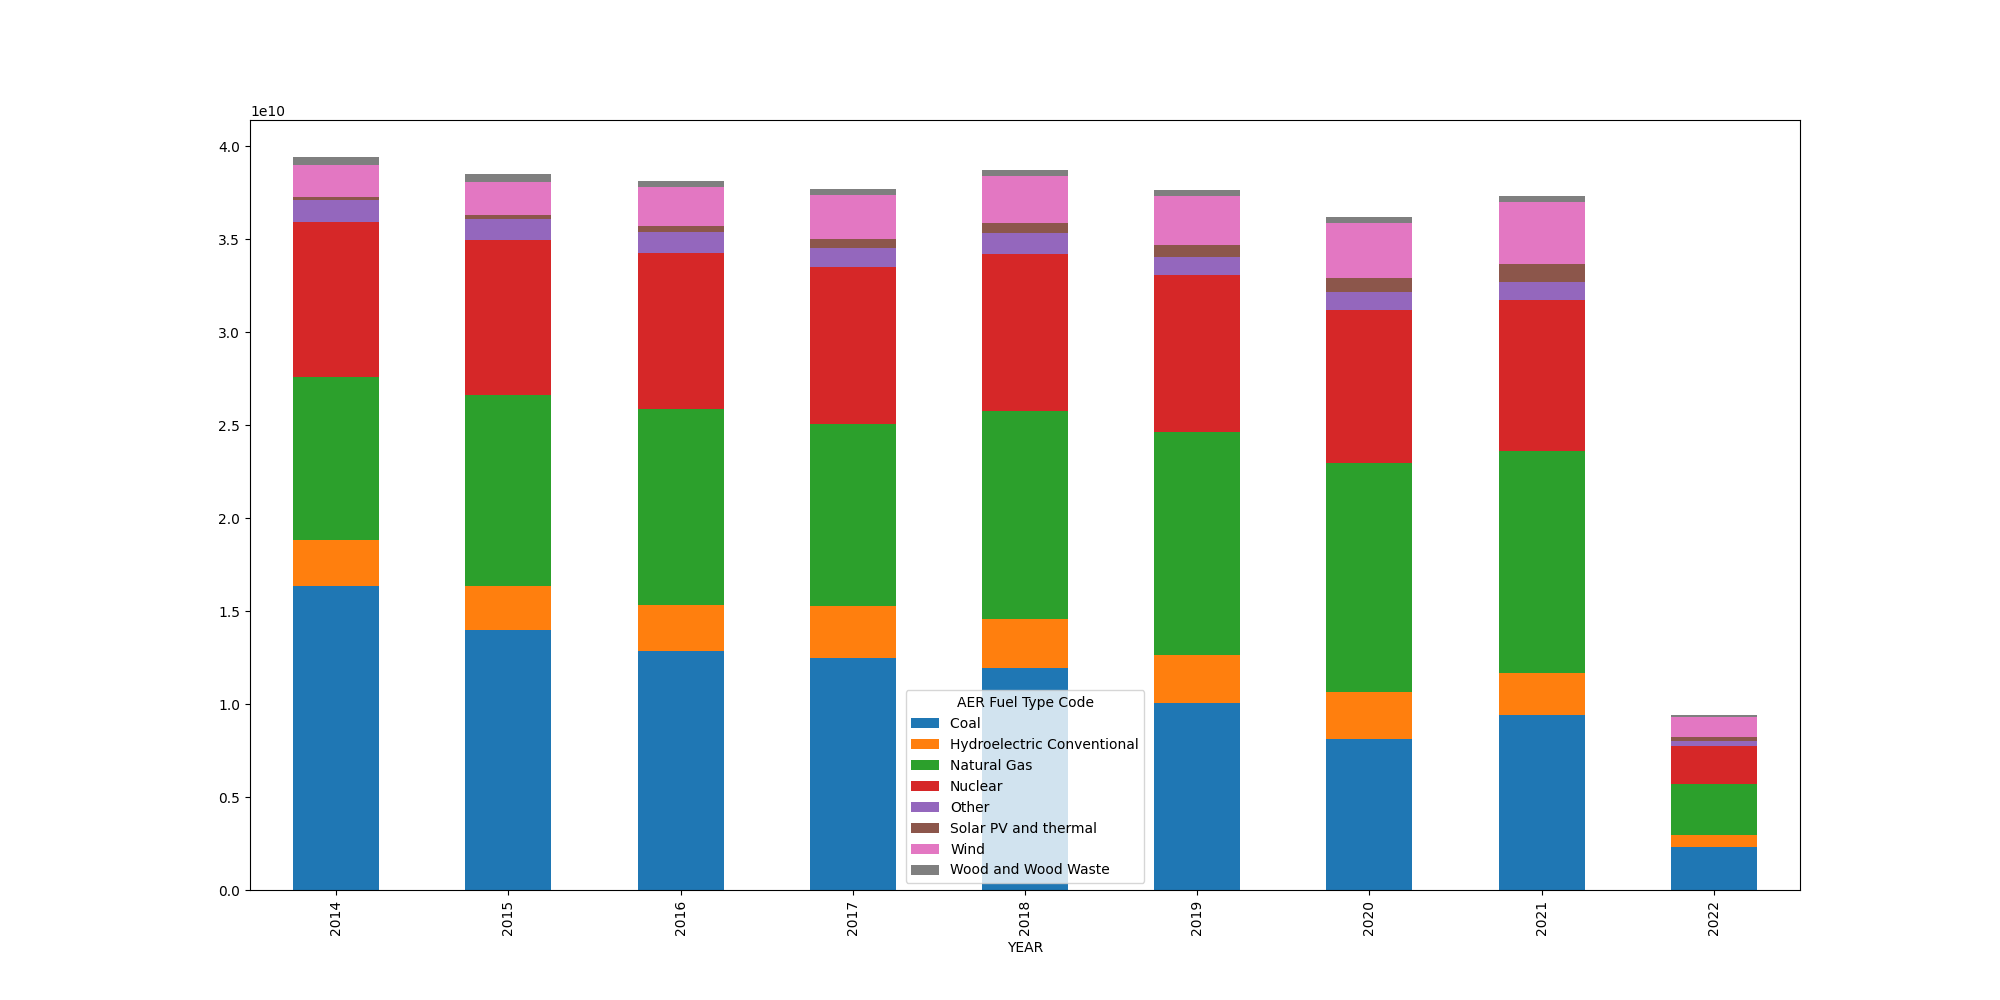

In [145]:
# Annual fuel mix

import matplotlib.pyplot as plt
import seaborn as sns

df_fuelmix = Page1_All_tidy.groupby(['YEAR','AER Fuel Type Code']).agg({'Elec_Quantity value':np.sum,'Elec_MMBtu value':np.sum,'Netgen value':np.sum})

df_fuelmix_mmbtu = df_fuelmix['Elec_MMBtu value'].reset_index()
df_fuelmix_mmbtu = df_fuelmix_mmbtu.pivot(index='YEAR', columns='AER Fuel Type Code', values='Elec_MMBtu value')

df_fuelmix_mmbtu.plot(kind='bar', stacked=True, figsize=(20, 10))
# df_fuelmix_mmbtu



In [147]:
df_fuelmix_mmbtu['Total']=df_fuelmix_mmbtu.sum(axis=1)
df_fuelmix_mmbtu

AER Fuel Type Code,Coal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Solar PV and thermal,Wind,Wood and Wood Waste,Total
YEAR,,,,,,,,,
2014,1.633339e+10,2.466398e+09,8.769509e+09,8.338408e+09,1.210965e+09,1.669573e+08,1.723252e+09,430813276.0,3.943969e+10
2015,1.400891e+10,2.320820e+09,1.027235e+10,8.338129e+09,1.149312e+09,2.306026e+08,1.776580e+09,402036826.0,3.849874e+10
2016,1.286893e+10,2.472476e+09,1.050837e+10,8.427465e+09,1.085281e+09,3.318441e+08,2.094984e+09,359981490.0,3.814933e+10
2017,1.248271e+10,2.766915e+09,9.817988e+09,8.420713e+09,1.041597e+09,4.895402e+08,2.342048e+09,363166660.0,3.772468e+10
2018,1.192315e+10,2.663228e+09,1.119145e+10,8.438414e+09,1.096250e+09,5.810656e+08,2.482365e+09,361702604.0,3.873762e+10
2019,1.007716e+10,2.563537e+09,1.199698e+10,8.452467e+09,9.614977e+08,6.405974e+08,2.634834e+09,338316878.0,3.766539e+10
2020,8.147735e+09,2.502726e+09,1.231420e+10,8.251592e+09,9.301663e+08,7.825403e+08,2.964731e+09,318313623.0,3.621200e+10
2021,9.399317e+09,2.283334e+09,1.193766e+10,8.129062e+09,9.287437e+08,1.006072e+09,3.331699e+09,330712266.0,3.734660e+10
2022,2.308235e+09,6.739994e+08,2.731119e+09,2.043207e+09,2.428882e+08,2.552684e+08,1.049131e+09,82558909.0,9.386406e+09


In [148]:
df_new = df_fuelmix_mmbtu.iloc[:,0:8].div(df_fuelmix_mmbtu['Total'], axis=0)
df_new= np.round(df_new*100,1)

df_new

AER Fuel Type Code,Coal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Solar PV and thermal,Wind,Wood and Wood Waste
YEAR,,,,,,,,
2014,41.4,6.3,22.2,21.1,3.1,0.4,4.4,1.1
2015,36.4,6.0,26.7,21.7,3.0,0.6,4.6,1.0
2016,33.7,6.5,27.5,22.1,2.8,0.9,5.5,0.9
2017,33.1,7.3,26.0,22.3,2.8,1.3,6.2,1.0
2018,30.8,6.9,28.9,21.8,2.8,1.5,6.4,0.9
2019,26.8,6.8,31.9,22.4,2.6,1.7,7.0,0.9
2020,22.5,6.9,34.0,22.8,2.6,2.2,8.2,0.9
2021,25.2,6.1,32.0,21.8,2.5,2.7,8.9,0.9
2022,24.6,7.2,29.1,21.8,2.6,2.7,11.2,0.9


<AxesSubplot:xlabel='YEAR'>

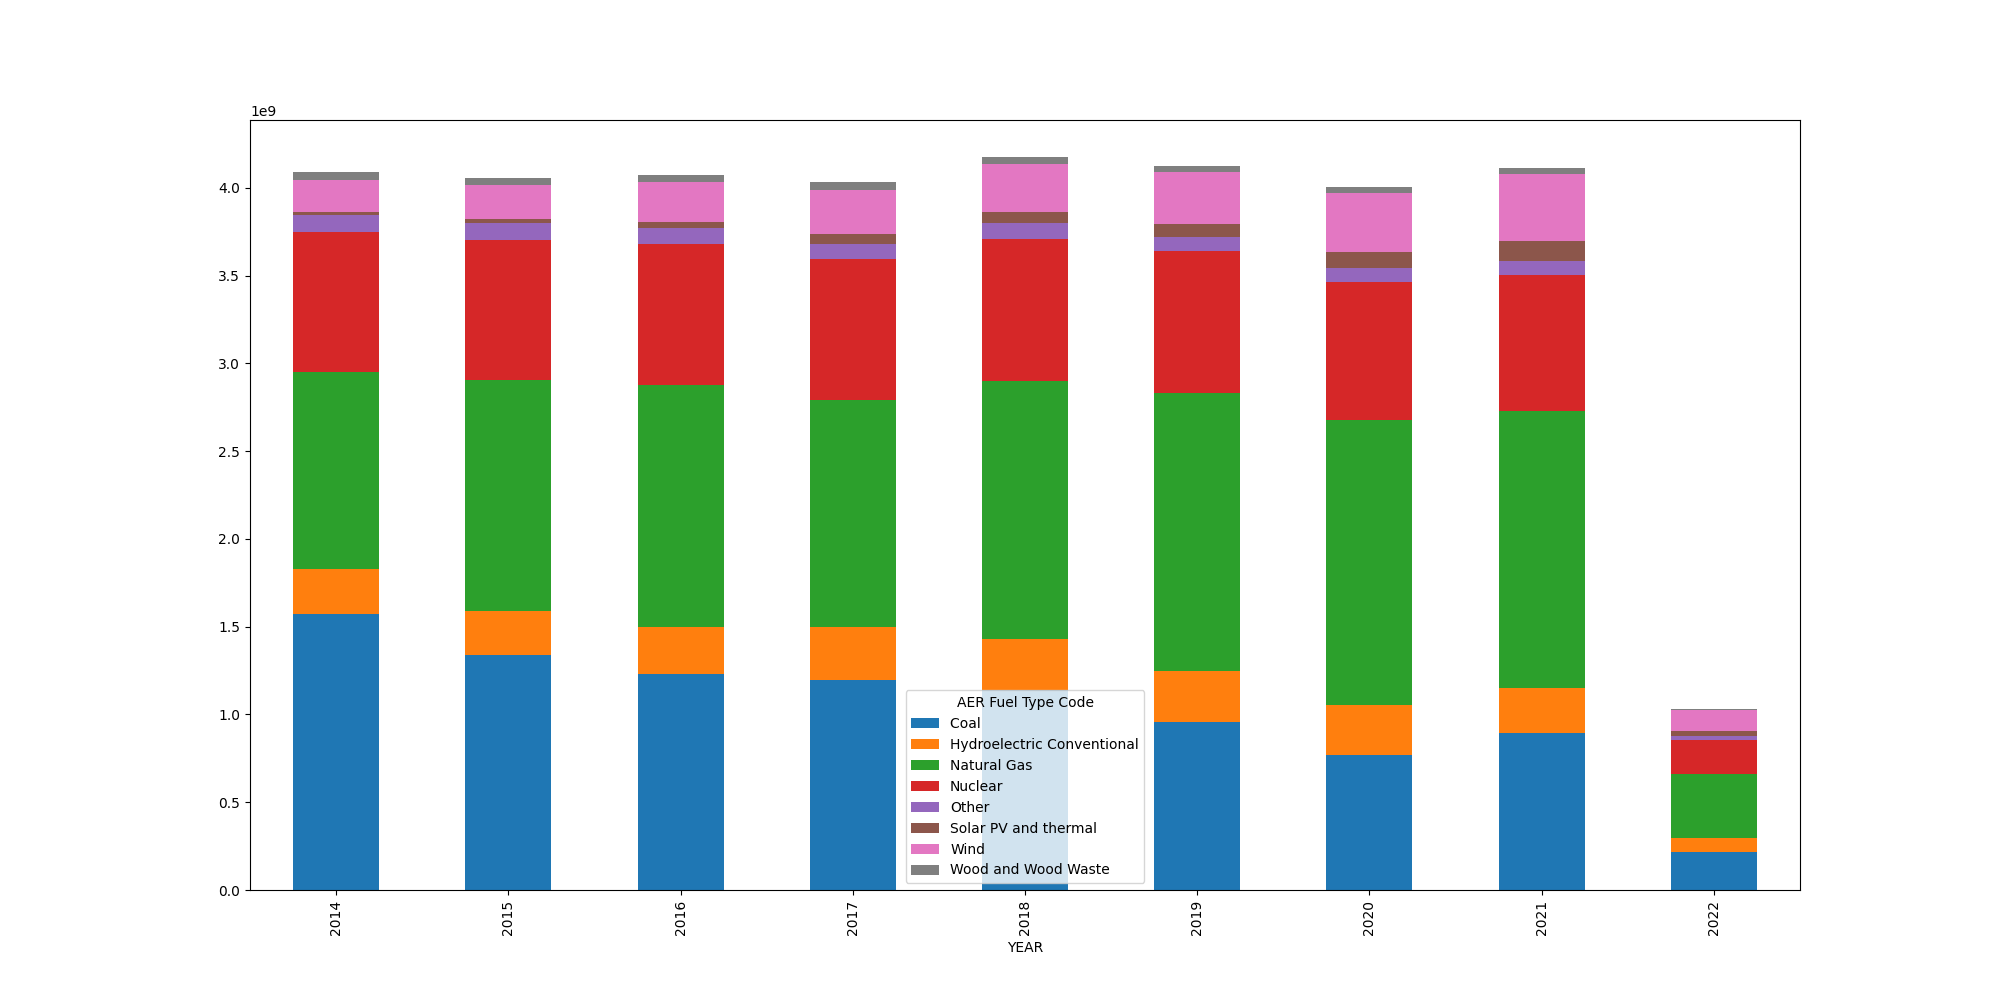

In [151]:
df_fuelmix_netgen = df_fuelmix['Netgen value'].reset_index()
df_fuelmix_netgen = df_fuelmix_netgen.pivot(index='YEAR', columns='AER Fuel Type Code', values='Netgen value')



df_fuelmix_netgen
df_fuelmix_netgen.plot(kind='bar', stacked=True, figsize=(20, 10))

In [152]:
# Biggest Power Plants

df_prank = Page1_All_tidy.iloc[:,[0,1,2,4,6,14,8,10,11]]

df_prank_grouped = df_prank.groupby(['Plant Name','Operator Name','Plant State','AER Fuel Type Code','YEAR']).agg({'Elec_Quantity value':np.sum,'Elec_MMBtu value':np.sum,'Netgen value':np.sum})
df_prank_grouped = df_prank_grouped.reset_index()
# df_prank_grouped['Heat Rate']=0

df_prank_grouped = df_prank_grouped[df_prank_grouped['YEAR']==2021]

df_prank_grouped

,Plant Name,Operator Name,Plant State,AER Fuel Type Code,YEAR,Elec_Quantity value,Elec_MMBtu value,Netgen value
64,1st Energy,Virginia Electric & Power Co,VA,Coal,2021,0,0,0
69,1st Energy,Virginia Electric & Power Co,VA,Other,2021,0,0,0
136,2W Permian Solar Project Hybrid,"2W Permian Solar, LLC",TX,Other,2021,1904,0,-320
138,2W Permian Solar Project Hybrid,"2W Permian Solar, LLC",TX,Solar PV and thermal,2021,0,2869903,327129
211,500MW CC,New York Power Authority,NY,Natural Gas,2021,19754018,20345945,2744075.809
...,...,...,...,...,...,...,...,...
85105,Yuma Cogeneration Associates,Falcon Power Operating Company,AZ,Natural Gas,2021,412123,423102,52607
85114,Yuma Cogeneration Associates,Falcon Power Operating Company,AZ,Other,2021,0,0,0
85166,Zeeland Generating Station,Consumers Energy Company,MI,Natural Gas,2021,23812294,25409495,3292690
85189,Zimmerman Energy,Landfill Energy Systems,IN,Other,2021,1343155,697490,59115


In [225]:
import altair as alt

df_prank_grouped_fuel = df_prank_grouped.sort_values(by=['Netgen value'], ascending=False)

df_prank_grouped_fuel

df_prank_grouped_fuel=df_prank_grouped_fuel[df_prank_grouped_fuel['Elec_Quantity value']!="."]
df_prank_grouped_fuel=df_prank_grouped_fuel[df_prank_grouped_fuel['Netgen value']!=0]
df_prank_grouped_fuel=df_prank_grouped_fuel[df_prank_grouped_fuel['Netgen value']>0]
df_prank_grouped_fuel=df_prank_grouped_fuel[df_prank_grouped_fuel['Elec_MMBtu value']>=0]

input_checkbox = alt.binding_select(options=['Coal','Hydroelectric Conventional','Natural Gas','Nuclear','Other','Solar PV and thermal','Wind','Wood and Wood Waste'], name = 'AER Fuel Type Code')
selection = alt.selection_single(fields=['AER Fuel Type Code'])

alt.data_transformers.disable_max_rows()
alt.Chart(df_prank_grouped_fuel).mark_circle(size=60).encode(
    x='Elec_MMBtu value',
    y='Netgen value',
    color='AER Fuel Type Code',
    tooltip=['Plant Name','Operator Name','AER Fuel Type Code']
).interactive()
    
# alt.Chart.save('chart.html')


alt.Chart(...)

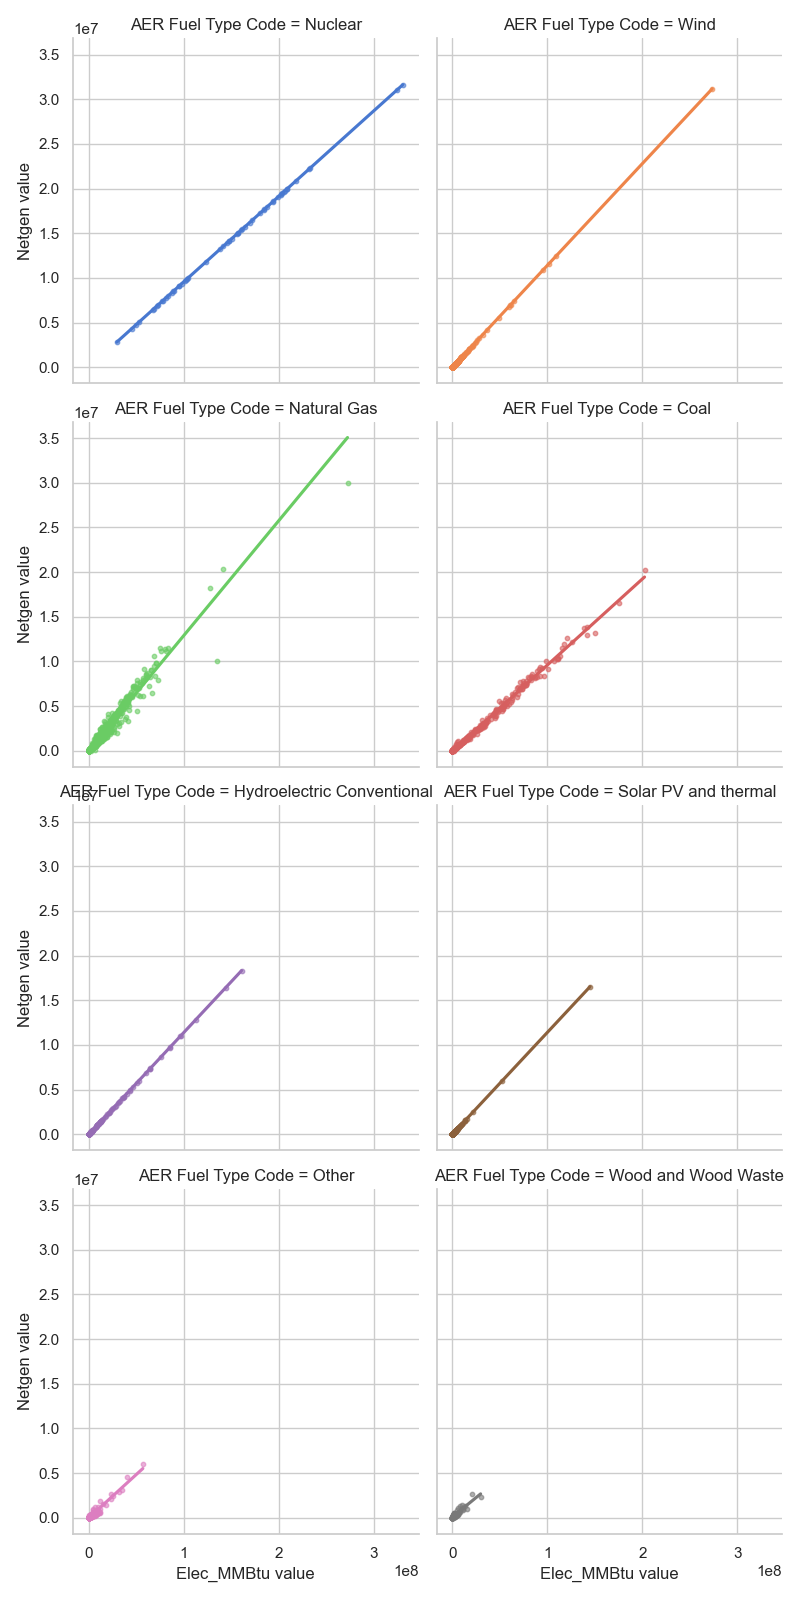

In [197]:
df_prank_grouped_fuel

df_prank_grouped_fuel['Heat Ratio'] = np.round((df_prank_grouped_fuel['Elec_MMBtu value']/df_prank_grouped_fuel['Netgen value']).astype(float),4)

df_prank_grouped_fuel

sns.lmplot(x='Elec_MMBtu value',y='Netgen value',data=df_prank_grouped_fuel,palette = "muted",scatter_kws={"s": 10, "alpha": .5},
           ci=None,height=4, col='AER Fuel Type Code', col_wrap=2, hue='AER Fuel Type Code')

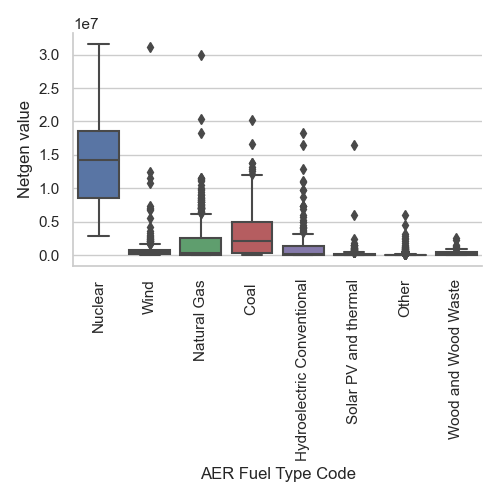

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# ax = sns.boxplot(x=df_prank_grouped_fuel["AER Fuel Type Code"], y=df_prank_grouped_fuel["Netgen value"], width=0.3)
# plt.show()

g = sns.catplot(kind="box", x='AER Fuel Type Code', y='Netgen value', data=df_prank_grouped_fuel)
g.set_xticklabels(rotation=90)
plt.tight_layout()